## 1. Introduction

Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not.
In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!

<p><img src="images/lego-bricks.jpg" alt = 'Lego'></p>

## 2. Data

A comprehensive database of lego blocks is provided by [Rebrickable](https://rebrickable.com/downloads/). The data is available as csv files and the schema is shown below.

![Data](./images/downloads_schema.png)

Let us start by reading in the colors data to get a sense of the diversity of lego sets!

In [5]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors

Now that we have read the colors data, we can start exploring it! Let us start by understanding the number of colors available.

In [2]:
# How many distinct colors are available?
num_colors = len(colors)
num_colors

135

## 4. Transparent Colors in Lego Sets

The colors data has a column named is_trans that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.

In [3]:
# colors_summary: Distribution of colors based on transparency
colors_summary =  colors.groupby(colors['is_trans']).count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets

Another interesting dataset available in this database is the sets data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained.

Let us use this data to explore how the average number of parts in Lego sets has varied over the years.

year
1950    10.142857
1953    16.500000
1954    12.357143
1955    36.857143
1956    18.500000
Name: num_parts, dtype: float64

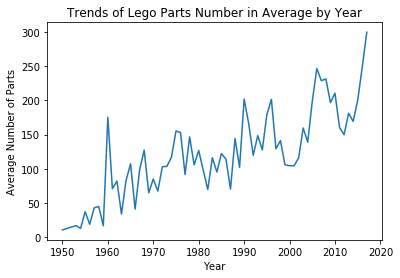

In [22]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets['num_parts'].groupby(sets['year']).mean()

# Plot trends in average number of parts by year
plt.plot(parts_by_year)
plt.title('Trends of Lego Parts Number in Average by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts');
parts_by_year.head()

## 6. Lego Themes Over Years

Lego blocks ship under multiple themes. Let us try to get a sense of how the number of themes shipped has varied over the years.

   year  theme_id
0  1950         7
1  1953         4
2  1954        14
3  1955        28
4  1956        12
    year  theme_id
61  2013       593
62  2014       715
63  2015       670
64  2016       609
65  2017       470


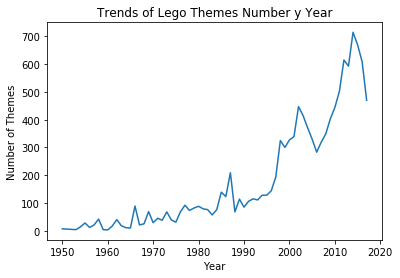

In [36]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index = False).agg({'theme_id': pd.Series.count})

# Plot trends in number of theme by year
plt.plot(themes_by_year['year'], themes_by_year['theme_id'])
plt.title('Trends of Lego Themes Number y Year')
plt.xlabel('Year')
plt.ylabel('Number of Themes');

print(themes_by_year.head())
print(themes_by_year.tail())

## 7. Wrapping It All Up!

Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes.